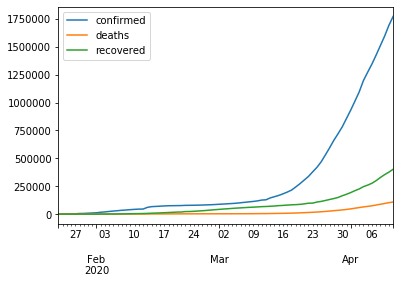

In [4]:
import pandas as pd

names = 'confirmed', 'deaths', 'recovered'

def load_data(name):
    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{name}_global.csv"
    return pd.read_csv(url)


def get_world(df):
    world = df.sum()[3:].astype('int')
    world.index = pd.DatetimeIndex(world.index)
    return world


world = pd.DataFrame()
for name in names:
    world[name] = get_world(load_data(name))

world.plot();
world.to_csv('covid19_world.csv', index_label='date', date_format='%Y-%m-%d')

In [10]:
data_dict = {name: load_data(name) for name in names}

countries = set(data_dict['confirmed']['Country/Region'])

json_str = "{"

for country in countries:
    df_country = pd.DataFrame(columns=names)
    for name, df_name in data_dict.items():
        ps_country = df_name.loc[df_name['Country/Region'] == country].sum()[4:].astype('int')
        ps_country.index = pd.DatetimeIndex(ps_country.index)
        df_country[name] = ps_country

    country_json = df_country.to_json(date_format='iso')
    json_str += f'"{country}":{country_json},'

# Replace last coma by json terminator
json_str = json_str[:-1] + "}"

with open('covid19.json', 'w') as f:
    f.write(json_str)
        
